### Get the Environment Ready

> Download the support files

In [1]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/requirements_tf_cert_exam.txt
clear_output()

In [2]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
clear_output()

> Install the libraries

In [3]:
!pip install -r requirements_tf_cert_exam.txt
!pip install split_folders
clear_output()

> import the libraries

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import random

In [5]:
print(f'tensorflow version : {tf.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'scipy version : {scipy.__version__}')

tensorflow version : 2.10.0
pandas version : 1.4.2
numpy version : 1.22.4
scipy version : 1.7.3


### Download And Unzip the Dataset

In [6]:
!wget 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'

--2023-04-04 10:17:35--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2023-04-04 10:17:35 (130 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [7]:
from helper_functions import unzip_untar_data

In [8]:
unzip_untar_data('jena_climate_2009_2016.csv.zip')

File extension : .zip
File extracting.......
Completed successfully


### Read the csv file using pandas

In [9]:
wdf = pd.read_csv('jena_climate_2009_2016.csv')
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


### Lets look at the correlation of the variables

In [10]:
import seaborn as sns

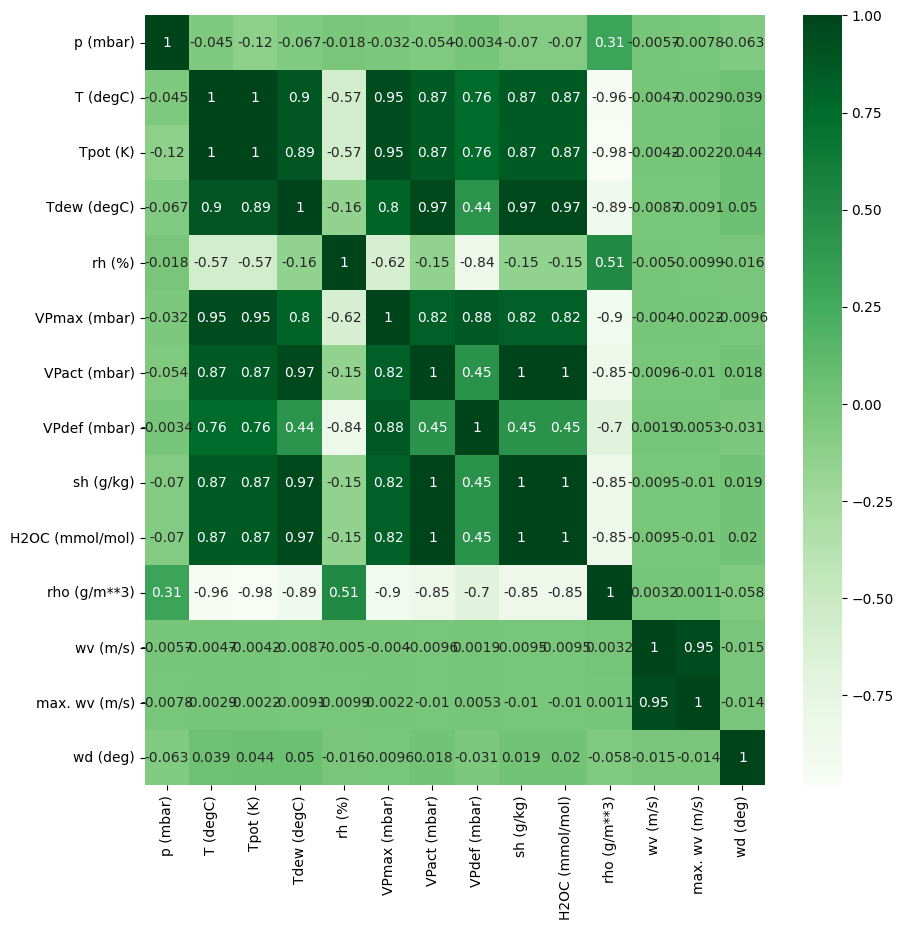

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(wdf.corr(), annot = True, cmap = 'Greens');

Based on the data, let us take 3 variables for predicting the temperatures

- T (degC)
- VPmax (mbar)
- H2OC (mmol/mol)

In [12]:
sel_cols = ['Date Time','T (degC)','VPmax (mbar)','H2OC (mmol/mol)']

In [13]:
wdf = wdf[sel_cols]

In [14]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   T (degC)         420551 non-null  float64
 2   VPmax (mbar)     420551 non-null  float64
 3   H2OC (mmol/mol)  420551 non-null  float64
dtypes: float64(3), object(1)
memory usage: 12.8+ MB


In [15]:
col_names = ['date','temp','pressure','h20']

In [16]:
wdf.columns = col_names
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      420551 non-null  object 
 1   temp      420551 non-null  float64
 2   pressure  420551 non-null  float64
 3   h20       420551 non-null  float64
dtypes: float64(3), object(1)
memory usage: 12.8+ MB


In [17]:
wdf.date = pd.to_datetime(wdf.date)
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      420551 non-null  datetime64[ns]
 1   temp      420551 non-null  float64       
 2   pressure  420551 non-null  float64       
 3   h20       420551 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.8 MB


In [18]:
wdf.date = pd.to_datetime(wdf.date.dt.date)
wdf.head()

,date,temp,pressure,h20
0,2009-01-01,-8.02,3.33,3.12
1,2009-01-01,-8.41,3.23,3.03
2,2009-01-01,-8.51,3.21,3.02
3,2009-01-01,-8.31,3.26,3.08
4,2009-01-01,-8.27,3.27,3.09


### Group the Dataset on a day basis on Median

In [19]:
med_wdf = wdf.groupby('date')[['temp','pressure','h20']].aggregate(np.median)
med_wdf.head()

,temp,pressure,h20
date,,,
2009-01-01,-6.870,3.64,3.300
2009-01-02,-3.295,4.79,3.970
2009-01-03,4.160,8.23,7.905
2009-01-04,9.455,11.85,6.110
2009-01-05,12.660,14.67,12.085


In [20]:
temp = med_wdf.temp.values
pressure = med_wdf.pressure.values
h20 = med_wdf.h20.values

temp[:3],pressure[:3],h20[:3]

(array([-6.87 , -3.295,  4.16 ]),
 array([3.64, 4.79, 8.23]),
 array([3.3  , 3.97 , 7.905]))

### Windowing the Dataset

In [21]:
horizon = 1
window = 15

In [22]:
from helper_functions import windowed_times_series

In [23]:
f_temp, l_temp = windowed_times_series(values = temp, window = window, horizon = horizon)
f_pressure,_ = windowed_times_series(values = pressure, window = window, horizon = horizon)
f_h20,_ = windowed_times_series(values = h20, window = window, horizon = horizon)

window size : 15 & horizon_size : 1
number of windows returned : 2906

window size : 15 & horizon_size : 1
number of windows returned : 2906

window size : 15 & horizon_size : 1
number of windows returned : 2906



In [24]:
f_temp[0],f_pressure[0],f_h20[0]

(array([-6.87 , -3.295,  4.16 ,  9.455, 12.66 , 14.745, 20.21 , 19.81 ,
        21.785, 12.195,  4.1  ,  3.925, -2.475, -4.51 ,  0.105]),
 array([ 3.64 ,  4.79 ,  8.23 , 11.85 , 14.67 , 16.8  , 23.725, 23.15 ,
        26.14 , 14.225,  8.2  ,  8.09 ,  5.09 ,  4.37 ,  6.155]),
 array([ 3.3  ,  3.97 ,  7.905,  6.11 , 12.085, 12.985, 19.305, 13.6  ,
        15.5  , 12.205,  7.225,  7.505,  3.35 ,  3.235,  5.77 ]))

In [25]:
l_temp[0]

-2.99

In [26]:
l_temp.shape

(2906,)

In [27]:
X = np.concatenate([f_temp, f_pressure,f_h20], axis = 1)
y = l_temp

In [28]:
X.shape, y.shape

((2906, 45), (2906,))

### Create the Split and Validation Sets

In [29]:
train_size = int(0.8*len(X))
train_size

2324

In [30]:
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:]
y_val = y[train_size:]

### Create Data pipeline

In [31]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val,y_val))

train_ds,val_ds

(<TensorSliceDataset element_spec=(TensorSpec(shape=(45,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(45,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>)

> Prefetch the dataset

In [32]:
batch_size = 32

In [33]:
train_ds = train_ds.shuffle(int(0.1*len(train_ds))).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [34]:
train_ds, val_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 45), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 45), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Get the callbacks functions ready

In [35]:
from helper_functions import create_model_checkpoint, reduce_learning_rate_callback

### Model 1 :

- Dense Model

In [36]:
from tensorflow.keras import layers

In [37]:
inputs = tf.keras.Input(shape = [window*3], name = 'input_layer')
x = layers.Dense(units = 128, activation = 'relu')(inputs)
x = layers.Dense(units = 64, activation = 'relu')(x)
outputs = layers.Dense(units = 1, activation  = 'linear')(x)

model_1  = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 45)]              0         
                                                                 
 dense (Dense)               (None, 128)               5888      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,209
Trainable params: 14,209
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_1 = model_1.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_1.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 15)])

Epoch 1/100
73/73 [==============================] - 2s 14ms/step - loss: 4.1049 - mae: 4.1049 - val_loss: 4.1688 - val_mae: 4.1688 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 1s 11ms/step - loss: 3.7834 - mae: 3.7834 - val_loss: 3.7192 - val_mae: 3.7192 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 1s 8ms/step - loss: 3.6043 - mae: 3.6043 - val_loss: 3.7536 - val_mae: 3.7536 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 1s 9ms/step - loss: 3.4563 - mae: 3.4563 - val_loss: 3.7635 - val_mae: 3.7635 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 1s 8ms/step - loss: 3.3651 - mae: 3.3651 - val_loss: 3.7987 - val_mae: 3.7987 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 1s 8ms/step - loss: 3.3712 - mae: 3.3712 - val_loss: 3.6529 - val_mae: 3.6529 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 1s 7ms/step - loss: 3.4145 - mae: 3.4145 - val_loss: 3.7552 - val_mae: 3.7552 - l

In [39]:
model_1.load_weights('checkpoints/model_1.h5')

In [40]:
from helper_functions import calculate_results_regression

In [41]:
def predict_show_results(model, val_ds):
  pred = np.squeeze(model.predict(val_ds))
  y_true = np.squeeze(np.array([x.numpy() for x in val_ds.unbatch().map(lambda x,y:y)]))
  results = calculate_results_regression(y_true = y_true, y_pred = pred)
  return results

In [42]:
results_1 = predict_show_results(model_1, val_ds)
results_1

19/19 [==============================] - 0s 2ms/step


{'mae': 3.41521, 'mse': 21.419949, 'rmse': 4.628169, 'mape': 348.13992}

### Model 2: 

Put Convolutions in place 

In [43]:
inputs = tf.keras.Input(shape = [window*3], name = 'input_layer')
x = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))(inputs)
x = layers.Conv1D(filters = 64,kernel_size = 3, padding = 'causal',activation = 'relu')(x)
x = layers.Conv1D(filters = 128,kernel_size = 3, padding = 'causal',activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(units = 16, activation  = 'relu')(x)
outputs = layers.Dense(units = horizon, activation  = 'linear')(x)

model_2  = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 45)]              0         
                                                                 
 lambda (Lambda)             (None, 1, 45)             0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             8704      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            24704     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                2064      
                                                                 
 dense_4 (Dense)             (None, 1)                 17  

In [44]:
history_2 = model_2.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_2.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 20)])

Epoch 1/100
73/73 [==============================] - 1s 8ms/step - loss: 4.7289 - mae: 4.7289 - val_loss: 3.7568 - val_mae: 3.7568 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 3.7522 - mae: 3.7522 - val_loss: 3.7213 - val_mae: 3.7213 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 0s 4ms/step - loss: 3.6173 - mae: 3.6173 - val_loss: 3.7288 - val_mae: 3.7288 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 3.5137 - mae: 3.5137 - val_loss: 3.6809 - val_mae: 3.6809 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 3.4996 - mae: 3.4996 - val_loss: 3.7053 - val_mae: 3.7053 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 5ms/step - loss: 3.4356 - mae: 3.4356 - val_loss: 3.6513 - val_mae: 3.6513 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 3.4091 - mae: 3.4091 - val_loss: 3.8179 - val_mae: 3.8179 - lr:

In [45]:
model_2.load_weights('checkpoints/model_2.h5')

In [46]:
results_2 = predict_show_results(model_2, val_ds)
results_2

19/19 [==============================] - 0s 2ms/step


{'mae': 3.4474008, 'mse': 21.57643, 'rmse': 4.6450434, 'mape': 324.74008}

### Model 3:

LSTM

In [47]:
inputs = tf.keras.Input(shape = [window*3], name = 'input_layer')
x = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))(inputs)
x = layers.LSTM(units = 64,activation = 'relu', return_sequences = True)(x)
x = layers.LSTM(units = 32,activation = 'relu')(x)
x = layers.Dense(units = 16, activation  = 'relu')(x)
outputs = layers.Dense(units = horizon, activation  = 'linear')(x)

model_3  = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'model_3')

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 45)]              0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 45)             0         
                                                                 
 lstm (LSTM)                 (None, 1, 64)             28160     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 41,121
Trainable params: 41,121
Non-trainable

In [48]:
history_3 = model_3.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_3.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 20)])

Epoch 1/100
73/73 [==============================] - 3s 10ms/step - loss: 5.3640 - mae: 5.3640 - val_loss: 4.1411 - val_mae: 4.1411 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 3.9178 - mae: 3.9178 - val_loss: 3.8205 - val_mae: 3.8205 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 1s 7ms/step - loss: 3.6547 - mae: 3.6547 - val_loss: 3.7378 - val_mae: 3.7378 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 1s 10ms/step - loss: 3.4840 - mae: 3.4840 - val_loss: 3.7060 - val_mae: 3.7060 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 1s 11ms/step - loss: 3.4779 - mae: 3.4779 - val_loss: 3.6052 - val_mae: 3.6052 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 0s 4ms/step - loss: 3.4604 - mae: 3.4604 - val_loss: 3.7652 - val_mae: 3.7652 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 0s 4ms/step - loss: 3.3964 - mae: 3.3964 - val_loss: 3.6375 - val_mae: 3.6375 - 

In [49]:
model_3.load_weights('checkpoints/model_3.h5')

In [50]:
results_3 = predict_show_results(model_3, val_ds)
results_3

19/19 [==============================] - 0s 2ms/step


{'mae': 3.4347084, 'mse': 21.700773, 'rmse': 4.6584086, 'mape': 348.5098}

### Compare all the results

In [51]:
all_results = pd.DataFrame({model_1.name : results_1,
                            model_2.name : results_2,
                            model_3.name : results_3}).transpose()

all_results.sort_values(by = 'mae', inplace = True)

all_results

,mae,mse,rmse,mape
model_1,3.415210,21.419949,4.628169,348.139923
model_3,3.434708,21.700773,4.658409,348.509796
model_2,3.447401,21.576429,4.645043,324.740082


Note : I see Model 3 performs better considering all the metrics, lets take thata as a best model there.

In [52]:
model_3.save('best_model.h5')

### Retrive the best model and predict

In [53]:
loaded_model = tf.keras.models.load_model('best_model.h5')

loaded_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 45)]              0         
                                                                 
 lambda_1 (Lambda)           (None, 1, 45)             0         
                                                                 
 lstm (LSTM)                 (None, 1, 64)             28160     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 41,121
Trainable params: 41,121
Non-trainable

In [54]:
loaded_model.evaluate(val_ds)

19/19 [==============================] - 0s 2ms/step - loss: 3.4347 - mae: 3.4347


[3.434708833694458, 3.434708833694458]

End of the Document